In [28]:
import os
import random
from fenics import *
from dolfin import *
#from mshr import *
import numpy as np
import sys

comm = MPI.comm_world
rank = MPI.rank(comm)

set_log_level(50)


nx, ny = 60, 60
LX, LY = 128, 128
count = 0
mesh = RectangleMesh(Point(0, 0), Point(LX, LY), nx, ny)

In [29]:
class PeriodicBoundary(SubDomain):

    def inside(self, x, on_boundary):
        return bool((near(x[0], 0) or near(x[1], 0)) and
                    (not ((near(x[0], 0) and near(x[1], LY)) or
                          (near(x[0], LX) and near(x[1], 0)))) and on_boundary)

    def map(self, x, y):
        if near(x[0], LX) and near(x[1], LY):
            y[0] = x[0] - LX
            y[1] = x[1] - LY
        elif near(x[0], LX):
            y[0] = x[0] - LX
            y[1] = x[1]
        else:   # near(x[1], 127)
            y[0] = x[0]
            y[1] = x[1] - LY


#####################################################################################################
V = VectorElement("Lagrange", mesh.ufl_cell(), 1, dim=2)
Q = FiniteElement("Lagrange", mesh.ufl_cell(), 1)
MFS = FunctionSpace(mesh, MixedElement([Q, V]), constrained_domain=PeriodicBoundary())
FS = FunctionSpace(mesh, Q, constrained_domain=PeriodicBoundary())
#####################################################################################################


u_star = Function(MFS)
(rho_star, tau_star) = split(u_star)

u = Function(MFS)
(rho, tau) = split(u)

data = HDF5File(comm, f"data_test_count_D_5.0_count_49_w_0.632_time_800_end_49200_start_49900.h5", 'r')
data_ = HDF5File(comm, f"stripe_initial_states/forward_w_0.4_lmd_0.0_time_50000_seed_30005.h5", 'r')

w = Function(FS)

In [30]:
# saving the square rooted value because optimal solution file has activity stored with square root

w_0 = 0.04
class InitialConditions_w(UserExpression):
    def __init__(self, **kwargs):
        random.seed(1 + MPI.rank(MPI.comm_world))
        super().__init__(**kwargs)

    def eval(self, values, x):
        values[0] = np.sqrt(w_0)


w_init = InitialConditions_w(degree=1)
w.interpolate(w_init)

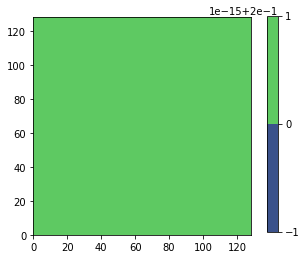

In [31]:
import matplotlib.pyplot as plt
c = plot(w)
plt.colorbar(c)

In [32]:
w_ = Function(FS)

In [33]:
total_control_time = 800
time_before_control_starts = 100


In [34]:
xdmffile_u = XDMFFile(comm, f'stripe_u_total_control_time_{total_control_time}_time_before_control_starts_{time_before_control_starts}.xdmf')
xdmffile_w = XDMFFile(comm, f'stripe_w_total_control_time_{total_control_time}_time_before_control_starts_{time_before_control_starts}.xdmf')




for i in range(time_before_control_starts):
    if (i % 10 == 0):
        print(f"i = {i}", flush = True)
        
    data_.read(u, f"u_new/Vector/vector_{49800 + i}")
    xdmffile_u.write(u, i)
    xdmffile_w.write(w, i)
    
for j in range(i, total_control_time + i):
    
    if (j % 10 == 0):
        print(f"j = {j}", flush = True)
        
    data.read(u, f"u_new/Vector/vector_{j - i}")
    data.read(w, f"w/Vector/vector_{j - i}")

    xdmffile_u.write(u, j)
    xdmffile_w.write(w, j)
    
Hdf.close()

i = 0
i = 10
i = 20
i = 30
i = 40
i = 50
i = 60
i = 70
i = 80
i = 90
j = 100
j = 110
j = 120
j = 130
j = 140
j = 150
j = 160
j = 170
j = 180
j = 190
j = 200
j = 210
j = 220
j = 230
j = 240
j = 250
j = 260
j = 270
j = 280
j = 290
j = 300
j = 310
j = 320
j = 330
j = 340
j = 350
j = 360
j = 370
j = 380
j = 390
j = 400
j = 410
j = 420
j = 430
j = 440
j = 450
j = 460
j = 470
j = 480
j = 490
j = 500
j = 510
j = 520
j = 530
j = 540
j = 550
j = 560
j = 570
j = 580
j = 590
j = 600
j = 610
j = 620
j = 630
j = 640
j = 650
j = 660
j = 670
j = 680
j = 690
j = 700
j = 710
j = 720
j = 730
j = 740
j = 750
j = 760
j = 770
j = 780
j = 790
j = 800
j = 810
j = 820
j = 830
j = 840
j = 850
j = 860
j = 870
j = 880
j = 890


In [35]:
xdmffile_u.close()
xdmffile_w.close()


